# Counting Cells in Microscopic Images

**by [Tony Kabilan Okeke](mailto:tko35@drexel.edu)**

In [3]:
%load_ext autoreload
%autoreload 2

import sys,os; sys.path.append(os.environ['BMESAHMETDIR']); import bmes
bmes.pipinstall('skimage','scikit-image')

%matplotlib inline

# the hwbmeimg_countcells.py file should be in the same folder.
from hwbmeimg_countcells import *
import skimage
from skimage import io
from skimage.io import *
from pylab import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


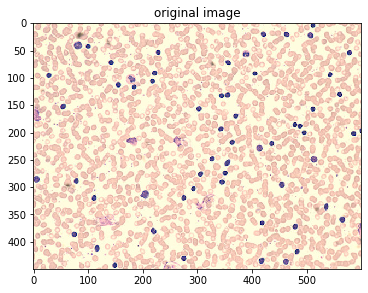

In [22]:
file=bmes.downloadurl('http://sacan.biomed.drexel.edu/lib/exe/fetch.php?media=course:bcomp2:img:samplecells.jpg','samplecells.jpg');

img = imread(file);
cellcount = hwbmeimg_countcells(file, True)

In [ ]:
% Find and download your own example image.
% If image is available as a URL, use bmes.downloadurl() to download it.
% If image is not available as a URL, manually place a copy of the image in
% the same folder as this script, and hard-code the file name.

% Uncomment the following line if you have a url.
% file=bmes.downloadurl('ENTER YOUR OWN URL','samplecells2.jpg');
% Uncomment the following line if you have a local file in instead.
% file='./samplecells2.jpg';

hwbmeimg_countcells(file, true)